# 1_A
واریانس و میانگین سن ثروتمند ترین افراد دنیا

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### preprocessing

In [101]:
df=pd.read_csv("Billionaire.csv")
# delete null
df.dropna(inplace=True)
# delete duplicates
df.drop_duplicates(inplace=True)
# data in wrong format
df["NetWorth"]=df["NetWorth"].str.strip("$").str.strip("B").astype(float)
df["Country"]=df["Country"].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2676 non-null   object 
 1   NetWorth  2676 non-null   float64
 2   Country   2676 non-null   object 
 3   Source    2676 non-null   object 
 4   Rank      2676 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2676 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 167.2+ KB
None


### processing

In [102]:
# mean
mean=df["Age"].mean()
print(f"Average age of billionaires: {mean}")
# variance
def sub(x):
    re=x-mean
    return re
def square(x):
    re=x**2
    return re
var=df["Age"].apply(sub).apply(square).mean()

print(f"variance age of billionaires : {var}")

Average age of billionaires: 63.1136023916293
variance age of billionaires : 180.70458328585374


# 1_B
نمودار مجموع ثروت ده کشور

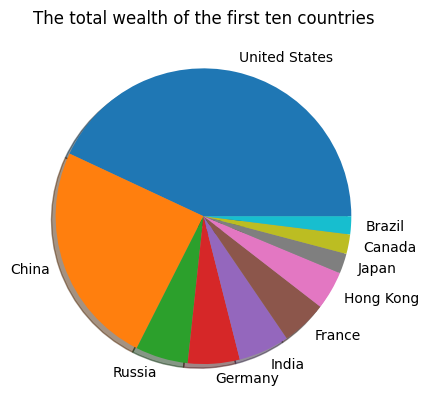

In [103]:

df_new=df.groupby("Country")["NetWorth"].sum().reset_index()

df_new=df_new.sort_values(by=["NetWorth"],ascending=False).reset_index()
plt.pie(df_new["NetWorth"].head(10).to_numpy(),labels=df_new["Country"].head(10).to_numpy(dtype=str),shadow=True)
plt.title("The total wealth of the first ten countries")
plt.show()

# 1_C
ده فرد اول ثروتمند آمریکا همراه ثروت آن ها

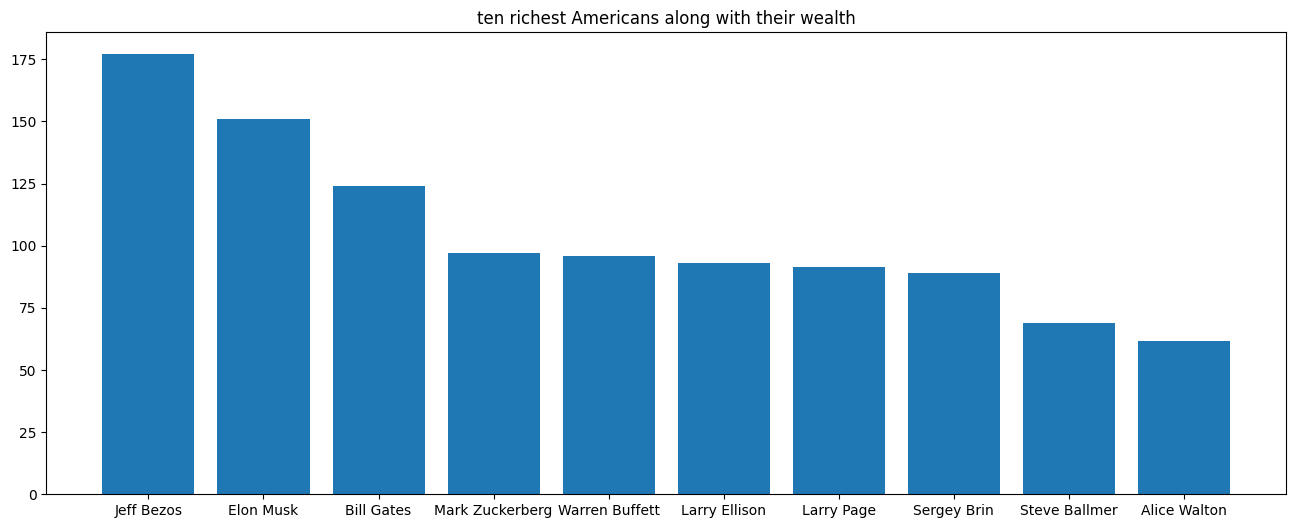

In [140]:
name=[]
nw=[]
for i in df.index:
    if df.loc[i,"Country"]=="United States":
        
        name.append(df.loc[i,"Name"])
        nw.append(df.loc[i,"NetWorth"])
name=pd.DataFrame(name)
nw=pd.DataFrame(nw)
plt.figure(figsize=(16,6))
plt.bar(name[0].head(10),nw[0].head(10))
plt.title("ten richest Americans along with their wealth")
plt.show()

# 1_D
ده کشوری که کمترین تعداد ثروتمند در جهان دارند

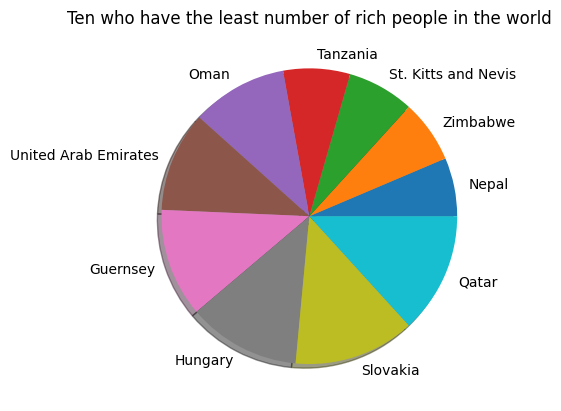

In [142]:
df_new2=df.groupby("Country")["NetWorth"].sum().reset_index()

df_new2=df_new.sort_values(by=["NetWorth"],ascending=True).reset_index()
plt.pie(df_new2["NetWorth"].head(10).to_numpy(),labels=df_new2["Country"].head(10).to_numpy(dtype=str),shadow=True)
plt.title("Ten who have the least number of rich people in the world")
plt.show()